* cyclops gene 이랑 cancer role gene이랑 겹치는 것들: {'CARS', 'CDC73', 'DDX10', 'NUP98', 'SRSF3', 'U2AF1'}

## TODO

1. cell line cnv와 cyclops, oncogene, TSG, TSG/oncogene 각각 비교 (비율이 어떻게 되나)
2. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [167]:
# import datasets
mutation_df = pd.read_table('../CCLE_BR_lines_mutation.txt', header=0, index_col=0, sep='\t')
cell_cnv_df = pd.read_table('../CCLE_BR_lines_CNV.txt', header=0, index_col=0, sep='\t')

# parse out '_BREAST' part in cell line names
cell_cnv_df.columns = [token[0] for token in cell_cnv_df.columns.str.split('_')]
deep_input = pd.read_table('../deep_input_c3_pert_v2LogN', header=0, index_col=None, usecols=['Gene:Cell', 'T/F'], sep='\t')
deep_input = pd.concat([deep_input['Gene:Cell'].str.split(':', expand=True), deep_input['T/F']], axis=1)
deep_input.columns = ['gene', 'cell', 'ess']

cyclops = pd.read_table('../CYCLOPS_project_drive.txt', header=None, names=['gene'], index_col=False)
cyclops = cyclops.gene.values
cancer_role = pd.read_table('../Cancer_Role.tsv', header=None, names=['gene', 'role'], index_col=False)
oncogenes = cancer_role[cancer_role.role == 'oncogene'].gene.values
tsg = cancer_role[cancer_role.role == 'TSG'].gene.values
both = cancer_role[cancer_role.role == 'oncogene/TSG'].gene.values

             Entrez_Gene_Id  NCBI_Build Chromosome  Start_position  \
Hugo_Symbol                                                          
TNFRSF25               8718          37          1         6524705   
VAV3                  10451          37          1       108298069   
SCN3A                  6328          37          2       166012313   
PLAG1                  5324          37          8        57079635   
NUP98                  4928          37         11         3800207   

             End_position Strand Variant_Classification Variant_Type  \
Hugo_Symbol                                                            
TNFRSF25          6524705      +      Nonsense_Mutation          SNP   
VAV3            108298069      +      Nonsense_Mutation          SNP   
SCN3A           166012313      +      Nonsense_Mutation          SNP   
PLAG1            57079635      +      Nonsense_Mutation          SNP   
NUP98             3800207      +      Nonsense_Mutation          SNP   

    

In [168]:
# add cnv info to deep_input dataframe
ls = []
for idx, row in deep_input.iterrows():
    try:
        ls.append(cell_cnv_df.loc[row.gene, row.cell])
    except KeyError:
        ls.append(np.nan)
deep_input['cnv'] = pd.Series(ls)
# drop items that have no cnv values
deep_input = deep_input[deep_input['cnv'].notnull()]

In [169]:
# add cancer_role and cyclops info to deep_input dataframe
deep_input.reset_index(drop=True, inplace=True)
cyclops_flag = []
tumor_gene_flag = []
for idx, row in deep_input.iterrows():
    if row.gene in cyclops:
        cyclops_flag.append(1)
    else:
        cyclops_flag.append(0)
    
    if row.gene in cancer_role.gene.values:
        tumor_gene_flag.append(cancer_role[cancer_role['gene'] == row.gene]['role'].values[0])
    else:
        tumor_gene_flag.append(np.nan)

deep_input['CYCLOPS'] = pd.Series(cyclops_flag)
deep_input['role'] = pd.Series(tumor_gene_flag)
deep_input.to_csv('../ccle_ess_cnv_cyclops_role.tsv', sep='\t')

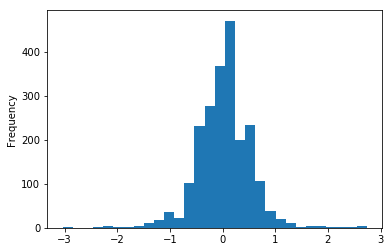

In [49]:
plt.figure()
deep_input[deep_input['ess'] == 0]['cnv'].plot.hist(bins=30)
plt.show()

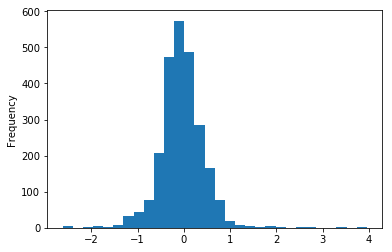

In [50]:
plt.figure()
deep_input[deep_input['ess'] == 1]['cnv'].plot.hist(bins=30)
plt.show()

In [126]:
# cell_cnv_df vs. cyclops
cyclops_del = []
cnt = 0
for idx, row in cell_cnv_df.loc[cyclops, :].iterrows():
    if row[row < 0].shape[0] > row[row > 0].shape[0]:
        cyclops_del.append(idx)
        cnt += 1
print cyclops_del

['ABCE1', 'CTR9', 'MCRS1', 'RPA2', 'CWC22', 'MED11', 'ANAPC4', 'DDX10', 'MED28', 'ATP6V1B2', 'DDX23', 'AURKB', 'RPP14', 'SUPT6H', 'NUP98', 'DHX15', 'CARS', 'EEF2', 'PHF5A', 'RRM1', 'UBL5', 'EIF3A', 'RRP9', 'PLRG1', 'CDC27', 'USPL1', 'POLR2A', 'SF3A1', 'POLR2B', 'VCP', 'CHAF1A', 'CHAF1B', 'RBX1', 'SKIV2L2', 'PPWD1', 'SMNDC1', 'MAD2L1', 'SMU1', 'WDR82', 'MCM5', 'XAB2', 'RPA1', 'SNRPF', 'XRCC6', 'CTDP1']


In [132]:
cyclops_tcga_del = []
with open ('../cyclops_tcga_del.txt', 'r') as f:
    for gene in f.readlines():
        cyclops_tcga_del.append(gene.strip())
        

['ABCE1',
 'CTR9',
 'MCRS1',
 'PSMA4',
 'RPA2',
 'CWC22',
 'MED11',
 'ANAPC4',
 'DDX10',
 'MED28',
 'PSMC1',
 'RPL35',
 'ATP6V1B2',
 'DDX23',
 'AURKB',
 'RPP14',
 'NUP98',
 'TXN',
 'DHX15',
 'NUTF2',
 'CARS',
 'EEF2',
 'CCNK',
 'PHF5A',
 'RRM1',
 'UBL5',
 'EIF3A',
 'RRP9',
 'PLRG1',
 'RAN',
 'USP39',
 'CDC27',
 'EIF3G',
 'USPL1',
 'CDC45',
 'EIF3I',
 'POLR2A',
 'SF3A1',
 'POLR2B',
 'VCP',
 'CHAF1A',
 'FAU',
 'POLR2D',
 'PPIL2',
 'RBX1',
 'PPWD1',
 'SMNDC1',
 'WDR61',
 'MAD2L1',
 'PRPF4',
 'SMU1',
 'WDR82',
 'MCM5',
 'XAB2',
 'COPZ1',
 'PSMA3',
 'RPA1',
 'SNRPF',
 'XRCC6',
 'CTDP1']

In [135]:
with open('../cyclops_tcga_ccle_del.txt', 'w') as f:
    for gene in set(cyclops_del) & set(cyclops_tcga_del):
        f.write(gene + '\n')

In [148]:
breast_cyclops = list(set(cyclops_del) & set(cyclops_tcga_del))

In [153]:
cell_cnv_df.loc[np.array(breast_cyclops), :] < 0

,BT20,BT474,CAL120,CAL51,EFM19,HCC1187,HCC1395,HCC1954,HCC2218,HCC70,...,MDAMB157,MDAMB175VII,MDAMB231,MDAMB361,MDAMB415,MDAMB436,MDAMB468,T47D,UACC812,ZR751
gene,,,,,,,,,,,,,,,,,,,,,
UBL5,True,True,False,True,False,False,True,True,False,False,...,False,False,False,True,True,True,False,True,True,True
MED28,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,True,False,True,True,True,True
MAD2L1,True,True,True,True,False,True,False,True,True,True,...,True,False,False,False,True,True,True,True,True,True
WDR82,True,True,True,False,False,True,False,True,True,True,...,True,False,False,True,True,True,True,True,False,True
RRP9,True,True,True,False,False,True,False,True,True,True,...,True,False,False,True,True,False,True,True,False,True
PPWD1,True,True,False,False,True,True,True,True,True,True,...,True,False,False,True,False,True,True,False,True,True
MCRS1,True,False,True,False,False,True,True,True,False,True,...,True,False,True,False,False,True,True,False,False,True
CHAF1A,True,True,False,True,True,True,True,True,False,True,...,False,False,False,True,True,True,True,True,True,True
RRM1,False,True,False,True,True,True,True,True,False,True,...,True,False,False,True,False,True,True,True,True,True


In [170]:
# drop cell lines (columns) that are not in the 77 input cell lines
cell_cnv_df.drop(list(set(cell_cnv_df.columns) - set(np.unique(deep_input.cell.values))), axis=1, inplace=True)

,BT20,BT474,CAL120,CAL51,EFM19,HCC1187,HCC1395,HCC1954,HCC2218,HCC70,...,HS578T,KPL1,MDAMB157,MDAMB231,MDAMB361,MDAMB415,MDAMB436,MDAMB468,T47D,ZR751
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0.3890,0.0706,0.6705,0.0093,-0.3960,0.4510,-0.4419,-0.1831,-0.9041,0.1532,...,0.2190,-0.1023,-1.0125,0.1025,0.0610,0.7256,0.3608,0.4525,-0.4435,0.1895
NAT2,-1.1842,-0.3632,-0.4460,-0.0221,-1.2911,0.1809,-0.3732,-1.1852,-0.9934,-2.6228,...,0.5639,-0.5847,-0.1954,-0.2970,-1.4493,-0.6250,0.4757,-0.2931,-0.4268,-0.1390
ADA,0.7980,1.7516,0.5664,-0.0136,0.0845,-0.3531,0.5764,0.2520,0.6168,-1.3538,...,0.2253,-0.2019,0.2583,0.4531,0.2405,0.4371,-0.5746,0.1114,0.4846,0.6378
CDH2,0.3634,0.2889,-0.1769,0.0093,-0.3419,0.6208,0.6477,-0.1493,0.0090,-0.1168,...,0.1505,-0.1619,-0.7580,0.1173,0.1663,-0.8064,0.3604,-0.3606,-0.4444,0.3677
AKT3,0.6755,1.4598,0.4514,-0.0409,0.4462,0.4859,0.1941,0.3615,0.9867,0.4725,...,-0.2988,0.3221,0.7559,0.1055,0.1966,1.5525,0.3888,0.4108,0.1410,1.1919
GAGE12F,-0.4845,0.2384,-0.4994,0.0231,0.1641,-0.1176,-0.5744,0.5734,0.0021,-0.8967,...,-0.1649,-0.1703,0.2277,0.2675,0.8663,-0.0033,0.1974,-0.3382,0.6391,-0.0275
LOC100009676,0.5308,0.0336,-0.3721,0.0114,0.4113,-0.2727,-0.2915,-0.0913,0.0448,0.7774,...,0.5099,0.1626,-0.1743,0.1573,0.1794,0.0249,0.3585,0.1553,0.1068,-0.0508
MED6,0.0524,0.2663,-0.1421,-0.0221,0.2141,-0.3018,-0.4701,-0.0324,0.0525,0.1717,...,-0.3163,0.4820,-0.1967,0.0933,-0.3522,0.0144,-0.5501,-0.3148,0.5064,-0.0850
NR2E3,0.2527,0.3352,-0.4138,0.0014,0.4066,-0.3107,0.3743,-0.1519,0.0514,-0.1929,...,-0.2985,0.3788,-0.2100,-0.3859,0.2161,0.0088,-0.5424,-0.3891,0.0668,0.0859


In [173]:
indices = []
for idx, row in deep_input.iterrows():
    if row.gene in breast_cyclops:
        indices.append(idx)

In [183]:
breast_cyclops_df = deep_input.loc[indices, :]

In [188]:
breast_cyclops_df[breast_cyclops_df['cnv'] < 0].ess.shape

(88,)

In [189]:
breast_cyclops_df[(breast_cyclops_df['cnv'] < 0) & (breast_cyclops_df['ess'] == 1)].ess.shape

(87,)